In [1]:
import pandas as pd

In [2]:
jbs= pd.read_csv('ICD-10CM order codes.csv')

In [3]:
jbs

,Order Number,ICD-10,Column3,Short Description,Long Description
0,1,A00,0,Cholera ...,Cholera
1,2,A000,1,"Cholera due to Vibrio cholerae 01, biovar chol...","Cholera due to Vibrio cholerae 01, biovar chol..."
2,3,A001,1,"Cholera due to Vibrio cholerae 01, biovar elto...","Cholera due to Vibrio cholerae 01, biovar eltor"
3,4,A009,1,"Cholera, unspecified ...","Cholera, unspecified"
4,5,A01,0,Typhoid and paratyphoid fevers ...,Typhoid and paratyphoid fevers
...,...,...,...,...,...
97291,97292,U07,0,Emergency use of U07 ...,Emergency use of U07
97292,97293,U070,1,Vaping-related disorder ...,Vaping-related disorder
97293,97294,U071,1,COVID-19 ...,COVID-19
97294,97295,U09,0,Post COVID-19 condition ...,Post COVID-19 condition


In [4]:
jbs.drop_duplicates(inplace=True)
jbs

,Order Number,ICD-10,Column3,Short Description,Long Description
0,1,A00,0,Cholera ...,Cholera
1,2,A000,1,"Cholera due to Vibrio cholerae 01, biovar chol...","Cholera due to Vibrio cholerae 01, biovar chol..."
2,3,A001,1,"Cholera due to Vibrio cholerae 01, biovar elto...","Cholera due to Vibrio cholerae 01, biovar eltor"
3,4,A009,1,"Cholera, unspecified ...","Cholera, unspecified"
4,5,A01,0,Typhoid and paratyphoid fevers ...,Typhoid and paratyphoid fevers
...,...,...,...,...,...
97291,97292,U07,0,Emergency use of U07 ...,Emergency use of U07
97292,97293,U070,1,Vaping-related disorder ...,Vaping-related disorder
97293,97294,U071,1,COVID-19 ...,COVID-19
97294,97295,U09,0,Post COVID-19 condition ...,Post COVID-19 condition


In [5]:
jbs['Short Description']= jbs['Short Description'].apply( lambda x: x.lower())

In [6]:
corpus= jbs['Short Description'].to_list()
#corpus

##### Text Cleaning

In [7]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 16.1 MB/s eta 0:00:00


In [8]:
from sentence_transformers import SentenceTransformer

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [9]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.05k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [10]:
corpus_embeddings = embedder.encode(corpus)

##### Clustering

In [11]:
from sklearn.cluster import MiniBatchKMeans

#from sklearn.cluster import KMeans

In [12]:
import matplotlib.pyplot as plt
sum_squared = []
for i in list([700, 900, 1000, 1200, 1400, 1600]):
    kmeans = MiniBatchKMeans(n_clusters=i, init="k-means++", random_state=42, batch_size=10)
    kmeans.fit(corpus_embeddings)
    sum_squared.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitl

<function matplotlib.pyplot.show(close=None, block=None)>

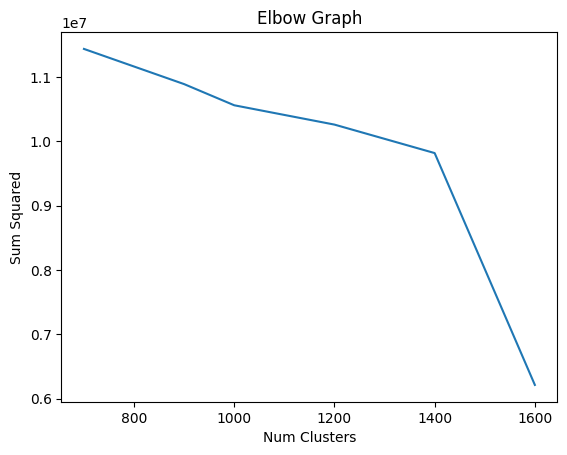

In [13]:
plt.plot(list([700, 900, 1000, 1200, 1400, 1600]), sum_squared)
plt.title("Elbow Graph")
plt.xlabel("Num Clusters")
plt.ylabel("Sum Squared")
plt.show

In [14]:
k=1200
b=10
km= MiniBatchKMeans(n_clusters=k, batch_size=b )
km

MiniBatchKMeans(batch_size=10, n_clusters=1200)

In [15]:
#pred=km.fit_predict(jbs)
model=km.fit(corpus_embeddings)
pred=model.predict(corpus_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [16]:
corpus_embeddings

array([[ 0.19398268, -0.54243404, -0.24635565, ..., -0.75030607,
        -0.634721  ,  0.7869968 ],
       [ 0.29155326, -0.36930126, -0.1523787 , ..., -0.1102399 ,
        -0.0612547 ,  0.8996231 ],
       [ 0.09659095, -0.28366193, -0.11691474, ..., -0.37799388,
         0.06272259,  0.80976593],
       ...,
       [ 0.1927268 ,  0.40966293,  0.5488785 , ..., -0.5389798 ,
        -0.493004  ,  1.2836632 ],
       [ 0.5712528 ,  0.17067327,  0.46699363, ..., -0.12302534,
         0.07159075,  0.99343383],
       [ 0.25415453, -0.09507673,  0.24725899, ..., -0.407041  ,
         0.23725922,  0.676036  ]], dtype=float32)

In [17]:
import pickle

with open('clustering_jobtitles_kmeans_v4.3.pkl', 'wb') as fout:
    pickle.dump((model), fout)

In [18]:
jbs['cluster']=pred
jbs['cluster'].value_counts()

,count
cluster,
408,752
141,567
392,536
957,515
197,422
...,...
1074,1
908,1
1021,1


##### Cluster Centroids

In [19]:
jbs

,Order Number,ICD-10,Column3,Short Description,Long Description,cluster
0,1,A00,0,cholera ...,Cholera,743
1,2,A000,1,"cholera due to vibrio cholerae 01, biovar chol...","Cholera due to Vibrio cholerae 01, biovar chol...",659
2,3,A001,1,"cholera due to vibrio cholerae 01, biovar elto...","Cholera due to Vibrio cholerae 01, biovar eltor",659
3,4,A009,1,"cholera, unspecified ...","Cholera, unspecified",139
4,5,A01,0,typhoid and paratyphoid fevers ...,Typhoid and paratyphoid fevers,743
...,...,...,...,...,...,...
97291,97292,U07,0,emergency use of u07 ...,Emergency use of U07,433
97292,97293,U070,1,vaping-related disorder ...,Vaping-related disorder,787
97293,97294,U071,1,covid-19 ...,COVID-19,789
97294,97295,U09,0,post covid-19 condition ...,Post COVID-19 condition,984


In [20]:
df=jbs.groupby('cluster')['Short Description'].value_counts()

In [21]:
df

cluster  Short Description                                            
0        biliary acute pancreatitis without necrosis or infection         1
         drug-induced hypoglycemia without coma                           1
         drug induced acute pancreatitis without necrosis or infct        1
         diffuse traumatic brain injury without loss of consciousness     1
         diaphragmatic hernia without obstruction or gangrene             1
                                                                         ..
1199     breakdown of implnt elec nstim of prph nrv lead, subs            1
         breakdown of implnt elec nstim of prph nrv lead, sequela         1
         breakdown of implnt elec nstim of prph nrv lead, init            1
         breakdown (mechanical) of implnt elec nstim of prph nrv lead     1
         mech compl of implnt elec nstim of prph nrv lead, subs           1
Name: count, Length: 96507, dtype: int64

In [22]:
df.to_csv('ClusteredJobTitles_v4.3.csv')

In [23]:
jbs.to_csv('data_with_clustered_jobtitles_v4.3.csv', index=False)

In [24]:
jbs['cluster'].value_counts()

,count
cluster,
408,752
141,567
392,536
957,515
197,422
...,...
1074,1
908,1
1021,1


In [25]:
# Encode a new sentence and predict its cluster
new_sentence = 'Patient is present with Typhiod fever'
embed = embedder.encode(new_sentence)
embed = embed.reshape(1, -1)
predicted_cluster = model.predict(embed)

In [26]:
# Print the predicted cluster
print(predicted_cluster)

[743]


In [27]:
from google.colab import files
files.download("data_with_clustered_jobtitles_v4.3.csv")
files.download("clustering_jobtitles_kmeans_v4.3.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
pip show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, sklearn-pandas, yellowbrick
